In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xgi

## Notebook 1

In [3]:
H = xgi.Hypergraph()
H.add_nodes_from(["A", "B", "C", "D"])
H.add_edges_from([{"A", "B"}, {"A", "B", "C"}])
print(H)

Unnamed Hypergraph with 4 nodes and 2 hyperedges


In [4]:
DH = xgi.DiHypergraph()
DH.add_edge([{"A", "B"}, {"C", "D"}])
print(DH)

Unnamed DiHypergraph with 4 nodes and 1 hyperedges


## Notebook 2

In [5]:
H = xgi.load_xgi_data("contact-high-school")
m1 = H.num_edges

H.cleanup(
    isolates=True,
    singletons=True,
    multiedges=False,
    connected=False,
    relabel=False,
    in_place=True,
)
m2 = H.num_edges

multiplicity = m1 / m2
print(multiplicity)

22.004988488104374


In [6]:
H = xgi.load_xgi_data("congress-bills", max_order=10)
xgi.write_edgelist(H, "edgelist.txt", delimiter="\t")

## Notebook 3

In [7]:
H = xgi.load_xgi_data("kaggle-whats-cooking")

In [8]:
len(H.edges.filterby("size", 5, "gt"))

35991

In [9]:
len(H.nodes.filterby("degree", 1))

1759

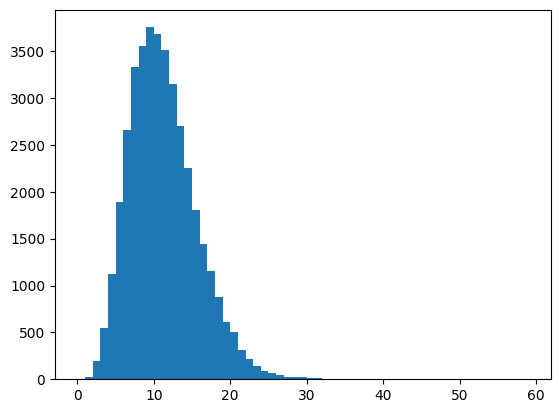

In [10]:
sizes = H.edges.size.asnumpy()
plt.hist(sizes, bins=np.arange(60))
plt.show()

In [11]:
@xgi.nodestat_func
def user_degree(net, bunch):
    """The user degree of a bunch of nodes in net."""
    return {
        n: sum(1.0 / net.edges.size[i] for i in net.nodes.memberships(n)) for n in bunch
    }

In [12]:
H.nodes.user_degree.asdict()

{'5930': 22.178295351530288,
 '3243': 21.648311896035345,
 '2095': 12.104833354926221,
 '2291': 407.9950965586385,
 '4243': 14.170853513120631,
 '1910': 167.41118325111913,
 '3671': 21.16816672170354,
 '5046': 36.237398832963876,
 '252': 634.129741155869,
 '836': 26.89116076344,
 '3494': 422.367016372095,
 '5990': 409.05515258228394,
 '4905': 345.8882475594675,
 '3689': 246.83450104985968,
 '1810': 36.44154292278517,
 '2454': 33.93668564411468,
 '5176': 272.6351062655378,
 '1979': 15.912264566458589,
 '5565': 12.182583305067817,
 '4799': 1739.9226392916573,
 '6530': 0.4020382842963488,
 '5635': 62.58698493582502,
 '4578': 296.8645727109005,
 '3013': 91.93955796092652,
 '2440': 43.575064164496226,
 '5965': 5.546664839288678,
 '3311': 128.45053904407135,
 '4335': 511.18327188873974,
 '2387': 82.60225909898051,
 '4910': 733.7578774678735,
 '4215': 2.870191693411508,
 '4617': 4.038052356140592,
 '5262': 27.364434423555874,
 '6428': 132.23610280739683,
 '678': 673.4065541003631,
 '3240': 22

In [13]:
H.nodes.degree.asdict()

{'5930': 270,
 '3243': 229,
 '2095': 148,
 '2291': 4438,
 '4243': 137,
 '1910': 1896,
 '3671': 228,
 '5046': 358,
 '252': 7380,
 '836': 361,
 '3494': 4784,
 '5990': 4385,
 '4905': 3388,
 '3689': 2263,
 '1810': 385,
 '2454': 341,
 '5176': 3058,
 '1979': 154,
 '5565': 108,
 '4799': 18048,
 '6530': 5,
 '5635': 768,
 '4578': 3296,
 '3013': 1184,
 '2440': 483,
 '5965': 65,
 '3311': 1442,
 '4335': 4847,
 '2387': 781,
 '4910': 7457,
 '4215': 26,
 '4617': 40,
 '5262': 343,
 '6428': 1394,
 '678': 7972,
 '3240': 2627,
 '1327': 1477,
 '6319': 24,
 '5043': 2036,
 '4531': 925,
 '6585': 2747,
 '188': 839,
 '345': 103,
 '2524': 282,
 '4447': 1523,
 '5984': 18,
 '1256': 1970,
 '1922': 1231,
 '891': 678,
 '3941': 501,
 '6700': 1298,
 '20': 6434,
 '2228': 1738,
 '5880': 338,
 '5408': 1730,
 '2': 940,
 '6057': 1094,
 '1452': 554,
 '172': 103,
 '6126': 796,
 '4271': 461,
 '3985': 73,
 '5878': 7971,
 '3969': 22,
 '3976': 1348,
 '6605': 173,
 '602': 51,
 '5308': 1,
 '2583': 965,
 '5700': 1439,
 '5031': 119,

In [14]:
print(
    f"The minimum and maximum number of ingredients are {H.edges.size.min()} and {H.edges.size.max()}, respectively"
)

The minimum and maximum number of ingredients are 1 and 65, respectively


In [15]:
d = H.nodes.degree.asdict()
id = max(d, key=d.get)
print(f"The most popular ingredient is {H.nodes[id]['name']}.")

The most popular ingredient is sugar.


## Notebook 4

In [ ]:
H = xgi.load_xgi_data("diseasome")
edge_sizes = xgi.unique_edge_sizes(H)

data = dict()
for s in edge_sizes:
    ids = H.edges.filterby("size", s)
    data[s] = xgi.subhypergraph(H, edges=ids)

In [ ]:
for s, h in data.items():
    print(s)
    print(xgi.unique_edge_sizes(h))

In [ ]:
H = xgi.load_xgi_data("email-eu")
H.cleanup()
D = H.dual()

In [ ]:
print(f"The number of singletons is {len(D.edges.singletons())}")
print(f"The number of isolates is {len(D.nodes.isolates())}")
print(f"The number of multiedges is {len(D.edges.duplicates())}")
print(f"Is the dual connected? {xgi.is_connected(D)}")

In [10]:
H = xgi.load_xgi_data("hospital-lyon")
H.cleanup()
SC = xgi.SimplicialComplex(H)

L = xgi.hodge_laplacian(SC, order=2)

Text(0, 0.5, 'order-2 simplices')

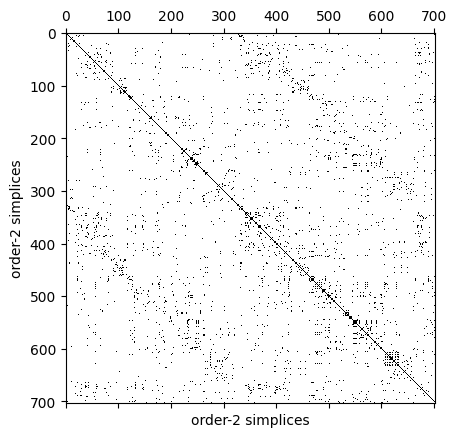

In [11]:
plt.spy(L)
plt.xlabel("order-2 simplices")
plt.ylabel("order-2 simplices")

In [16]:
H = xgi.load_xgi_data("kaggle-whats-cooking")
cuisines = set(H.edges.attrs("name").aslist())
subhypergraphs = dict()

print(cuisines)

for c in cuisines:
    subhypergraphs[c] = xgi.subhypergraph(H, edges=H.edges.filterby_attr("name", c))

{'brazilian', 'italian', 'british', 'chinese', 'thai', 'spanish', 'filipino', 'mexican', 'russian', 'vietnamese', 'jamaican', 'french', 'japanese', 'moroccan', 'southern_us', 'cajun_creole', 'indian', 'irish', 'korean', 'greek'}


In [17]:
num_unused_ingredients = dict()
most_used_ingredient = dict()
num_components = dict()

for c in cuisines:
    num_unused_ingredients[c] = len(subhypergraphs[c].nodes.isolates())
    d = subhypergraphs[c].nodes.degree.asdict()
    id = max(d, key=d.get)
    most_used_ingredient[c] = H.nodes[id]["name"]
    num_components[c] = xgi.number_connected_components(subhypergraphs[c])

In [18]:
print("Number of unused ingredients:")
print(num_unused_ingredients)
print("Most used ingredient:")
print(most_used_ingredient)
print("Number of connected components:")
print(num_components)

Number of unused ingredients:
{'brazilian': 5861, 'italian': 3785, 'british': 5548, 'chinese': 4922, 'thai': 5338, 'spanish': 5451, 'filipino': 5767, 'mexican': 4030, 'russian': 5842, 'vietnamese': 5606, 'jamaican': 5837, 'french': 4612, 'japanese': 5275, 'moroccan': 5740, 'southern_us': 4252, 'cajun_creole': 5138, 'indian': 5050, 'irish': 5715, 'korean': 5816, 'greek': 5516}
Most used ingredient:
{'brazilian': 'sugar', 'italian': 'sugar', 'british': 'sugar', 'chinese': 'bucatini', 'thai': 'yellow rice', 'spanish': 'sugar', 'filipino': 'sugar', 'mexican': 'sugar', 'russian': 'sugar', 'vietnamese': 'yellow rice', 'jamaican': 'sugar', 'french': 'sugar', 'japanese': 'bucatini', 'moroccan': 'sugar', 'southern_us': 'sugar', 'cajun_creole': 'sugar', 'indian': 'sugar', 'irish': 'sugar', 'korean': 'bucatini', 'greek': 'sugar'}
Number of connected components:
{'brazilian': 5862, 'italian': 3786, 'british': 5549, 'chinese': 4923, 'thai': 5340, 'spanish': 5452, 'filipino': 5768, 'mexican': 4031, 

## Notebook 5

In [ ]:
H = xgi.uniform_HPPM(100, 3, 8, 0.95)

pos = xgi.pca_transform(xgi.pairwise_spring_layout(H))
xgi.draw(H, pos=pos, node_fc=H.nodes.clustering_coefficient, node_shape="s")